In [50]:
''' First read csv file in to the data frame. Get the count of survived for each Pclass 
observation: 1.a) total male passenger=577 and female passenger=314
b)total no. of survivors in 1st class:
           
           total                              survived
           male_adult  female_adult  kid      male_adult female_adult  kid
class 1     118           86           12        41         84           11
class 2     97            64            23 .     8          58           21
class 3     304          109           78        37         53           29

= 136 (84 f, 41 m, 11 kid);2nd clss=87 (70 f, 17 m)
and third class 119(72 female and 47 m)

2. a)total no of minors =113. 
b)no. of minors survived with Pclass
      pclass      survived  total
       1          11        12
       2          21        23
       3          29        78
'''

' First read csv file in to the data frame. Get the count of survived for each Pclass \nobservation: 1. total no. of survivors in 1st class= 136 (91 f, 45 m);2nd clss=87 (70 f, 17 m)\nand third class 119(72 female and 47 m)\n\n2. total no of minors =113. no. of minors survived with Pclass\n       1          11\n       2          21\n       3          29\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic_survivor=pd.read_csv('/Users/admin/Desktop/DAND/Projects/titanic_survivor/titanic-data.csv')
print (titanic_survivor['Sex'].value_counts())
print(titanic_survivor['Name'])# fill Nan in Age column by 0 and count them as adult.
#titanic_survivor['Age'].fillna('0')

#define a function to devide the Sex column in to male female and kids
def calculate_kid(row):
    if row['Age']<18 and row['Age']!= 0 :
        return 'kid'
    else:
        return row['Sex']

# make new column ['Gender'] based on above function.
titanic_survivor['Gender']=titanic_survivor.apply(lambda row: calculate_kid (row),axis=1)

# get the total count per class and Gender
brief_count=titanic_survivor.groupby(['Pclass'],as_index='False')['Gender'].value_counts()
#get the survival count per class and gender
brief_count_survived=titanic_survivor.groupby(['Pclass','Gender'],as_index='False')['Survived'].sum()
# following lines will make a new dataframe with survival percentage of each gender for each class
survivor_list1=pd.concat([brief_count,brief_count_survived], axis=1)
survivor_list=survivor_list1.rename(index=str,columns={'Gender':'Total'})
survivor_list['Survived_percent']=survivor_list['Survived']*100/survivor_list['Total']
survivor_list['Survived_percent'].plot(kind='bar',colors=['y','g','b'])

plt.suptitle('Gender wise survival percentage for different passenger classes.')

print(titanic_survivor['Survived'].sum())

titanic_survivor.groupby(['Pclass']).sum()['Survived']


male      577
female    314
Name: Sex, dtype: int64
0                           Nicholson, Mr. Arthur Ernest
1                               Carlsson, Mr. Frans Olof
2                                          Bing, Mr. Lee
3                                          Ling, Mr. Lee
4                                         Lang, Mr. Fang
5                                        Foo, Mr. Choong
6                                           Lam, Mr. Ali
7                                           Lam, Mr. Len
8                                        Chip, Mr. Chang
9            Clarke, Mrs. Charles V (Ada Maria Winfield)
10                                Allum, Mr. Owen George
11                     Leeni, Mr. Fahim ("Philip Zenni")
12                                     Badt, Mr. Mohamed
13                                    Lahoud, Mr. Sarkis
14                       Thomas, Master. Assad Alexander
15                        Moussa, Mrs. (Mantoura Boulos)
16                                 A

/Users/admin/anaconda/lib/python2.7/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

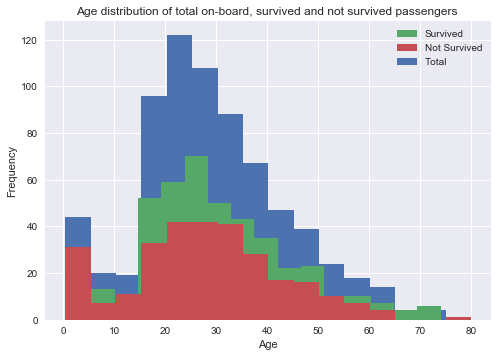

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


In [548]:
titanic_survivor['Age'].hist(bins=16)
x1=titanic_survivor.groupby(['Survived'])['Age']
x2=x1.plot.hist(bins=16,legend=True)
#lines, labels = x2.get_legend_handles_labels()
#x2.legend({'Survived','total'})
plt.legend([ "Survived",'Not Survived',"Total"]);
plt.xlabel('Age')
plt.title('Age distribution of total on-board, survived and not survived passengers ')
plt.show()
print(titanic_survivor['Age'].describe())
print(titanic_survivor.groupby(['Survived'])['Age'].describe())

In [2]:
titanic_survivor['Gender'].value_counts()

male      519
female    259
kid       113
Name: Gender, dtype: int64

In [482]:
print(titanic_survivor['Gender'].value_counts())
titanic_survivor.groupby(['Gender'])['Survived'].sum()

KeyError: 'Gender'

In [474]:
#def find_percent(total,var):
 #   return int(var)*100/int(total)
survivor_list['Survived_percent']=survivor_list['Survived']*100/survivor_list['Total']
survivor_list

Total  Survived  Survived_percent
Pclass Gender                                   
1      female     86        84         97.674419
       kid        12        11         91.666667
       male      118        41         34.745763
2      female     64        58         90.625000
       kid        23        21         91.304348
       male       97         8          8.247423
3      female    109        53         48.623853
       kid        78        29         37.179487
       male      304        37         12.171053

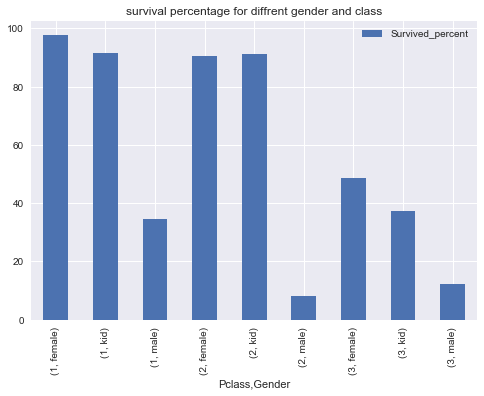

In [475]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.bar('Gender',survivor_list['Survived_percent'])
#survivor_list[['Gender','Survived']].plot()
#survivor_list.set_index('Gender').plot(kind='bar')
survivor_list.plot(y='Survived_percent',kind='bar')
plt.title("Survival percentage for diffrent gender and class")
plt.show()

In [476]:
Conclusion

NameError: name 'Conclusion' is not defined

In [477]:


survivor_relative2=titanic_survivor.groupby(['Pclass','Parch'],as_index='False')['Gender'].value_counts()
survivor_relative1=titanic_survivor.groupby(['Pclass','Parch','Gender'])['Survived'].sum()
survivor_relative3=pd.concat([survivor_relative2, survivor_relative1],axis=1)
survivor_relative=survivor_relative3.rename(index=str, columns={'Gender':'Total'})
print (survivor_relative)


KeyError: 'Column not found: Gender'

In [485]:
'''Here we will write two functions to add two columns in titanic_survivor data has-sinsp and has-
relative'''
def has_sibsp(row):
    return row['SibSp']!=0
titanic_survivor['Has_sibsp']=titanic_survivor.apply(lambda row: has_sibsp(row),axis=1)
def has_relative(row):
    return row['Parch']!=0 or row['SibSp']!=0 
titanic_survivor['Has_relative']=titanic_survivor.apply(lambda row: has_relative(row), axis=1)
#titanic_survivor

In [480]:
survivor_with_relative1=titanic_survivor.groupby(['Pclass','Has_relative'])['Gender'].value_counts()
#survivor_with_relative2=titanic_survivor.groupby(['Pclass','Has_relative','Gender'])['Survived'].sum()
#survivor_with_relative3=pd.concat([survivor_with_relative1,survivor_with_relative2],axis=1)
#survivor_with_relative=survivor_with_relative3.rename(index=str,columns={'Gender':'Total'})
#survivor_with_relative['Survived_percent']=survivor_with_relative['Survived']*100/survivor_with_relative['Total']
survivor_with_relative


KeyError: 'Column not found: Gender'

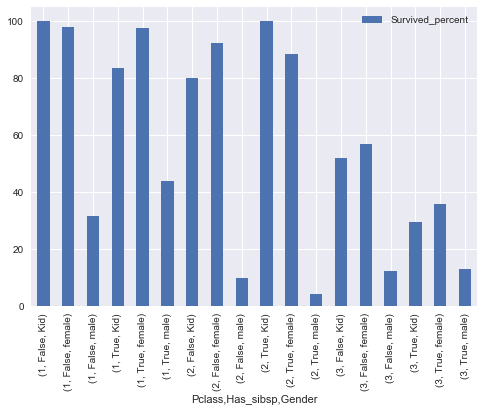

In [344]:
survivor_with_relative.plot(y='Survived_percent',kind='bar')
plt.show()

In [348]:
'''Here we will write two functions to add two columns in titanic_survivor data has-sinsp and has-
relative'''
def has_sibsp(row):
    return row['SibSp']!=0
titanic_survivor['Has_sibsp']=titanic_survivor.apply(lambda row: has_sibsp(row),axis=1)
def has_more_relative(row):
    return row['Parch']!=0 and row['SibSp']!=0 
titanic_survivor['Has_more_relative']=titanic_survivor.apply(lambda row: has_more_relative(row), axis=1)
#titanic_survivor
survivor_with_relative1=titanic_survivor.groupby(['Has_more_relative'])['Gender'].value_counts()
survivor_with_relative2=titanic_survivor.groupby(['Has_more_relative','Gender'])['Survived'].sum()
survivor_with_relative3=pd.concat([survivor_with_relative1,survivor_with_relative2],axis=1)
survivor_with_relative=survivor_with_relative3.rename(index=str,columns={'Gender':'Total'})
survivor_with_relative['Survived_percent']=survivor_with_relative['Survived']*100/survivor_with_relative['Total']
survivor_with_relative

Total  Survived  Survived_percent
Has_relative Gender                                   
False        Kid        52        34         65.384615
             female    212       166         78.301887
             male      485        80         16.494845
True         Kid        61        27         44.262295
             female     47        29         61.702128
             male       34         6         17.647059

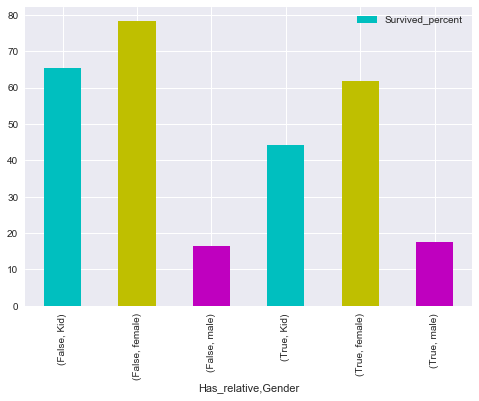

In [377]:
survivor_with_relative.plot(y='Survived_percent', kind='bar', color=('c','y','m'))
plt.show()

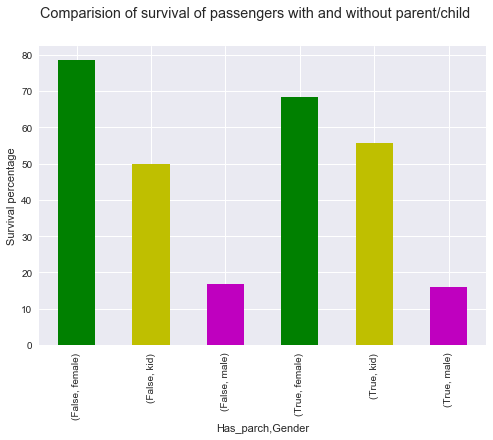

In [464]:
def has_parch(row):
     return row['Parch']!=0   
titanic_survivor['Has_parch']=titanic_survivor.apply(lambda row: has_parch(row), axis=1)
survivor_with_parch1=titanic_survivor.groupby(['Has_parch'])['Gender'].value_counts()
survivor_with_parch2=titanic_survivor.groupby(['Has_parch','Gender'])['Survived'].sum()
survivor_with_parch3=pd.concat([survivor_with_parch1,survivor_with_parch2],axis=1)
survivor_with_parch=survivor_with_parch3.rename(index=str,columns={'Gender':'Total'})
survivor_with_parch['Survived_percent']=survivor_with_parch['Survived']*100/survivor_with_parch['Total']
survivor_with_parch
ax=survivor_with_parch.plot(y='Survived_percent',kind= 'bar',color=('g','y','m'),legend=False)
plt.suptitle('Comparision of survival of passengers with and without parent/child')
ax.set_ylabel('Survival percentage')
plt.show()                        
#titanic_survivor['Has_parch']    

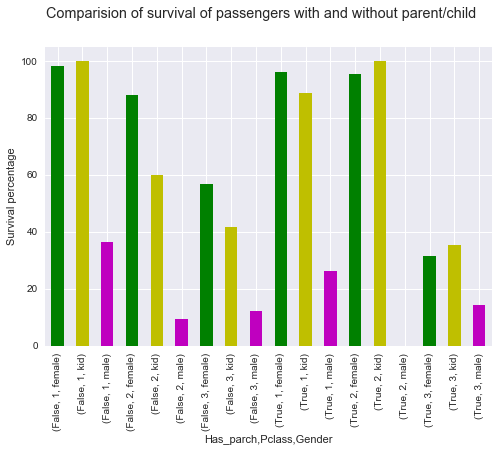

In [465]:
def has_parch(row):
     return row['Parch']!=0   
titanic_survivor['Has_parch']=titanic_survivor.apply(lambda row: has_parch(row), axis=1)
survivor_with_parch1=titanic_survivor.groupby(['Has_parch','Pclass'])['Gender'].value_counts()
survivor_with_parch2=titanic_survivor.groupby(['Has_parch','Pclass','Gender'])['Survived'].sum()
survivor_with_parch3=pd.concat([survivor_with_parch1,survivor_with_parch2],axis=1)
survivor_with_parch=survivor_with_parch3.rename(index=str,columns={'Gender':'Total'})
survivor_with_parch['Survived_percent']=survivor_with_parch['Survived']*100/survivor_with_parch['Total']
survivor_with_parch
ax=survivor_with_parch.plot(y='Survived_percent',kind= 'bar',color=('g','y','m'),legend=False)
plt.suptitle('Comparision of survival of passengers with and without parent/child')
ax.set_ylabel('Survival percentage')
plt.show()                        
#titanic_survivor['Has_parch']    

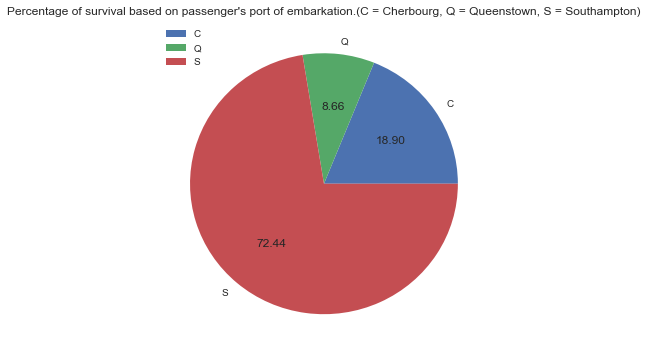

,Total,Survived,Survived_percent
Embarked,,,
C,168,93,55.357143
Q,77,30,38.961039
S,644,217,33.695652


In [492]:
# survival based on embarkment
#titanic_survivor['Has_parch']=titanic_survivor.apply(lambda row: has_parch(row), axis=1)
survivor_with_emb1=titanic_survivor.groupby(['Embarked'])['Embarked'].count()
survivor_with_emb2=titanic_survivor.groupby(['Embarked'])['Survived'].sum()
survivor_with_emb3=pd.concat([survivor_with_emb1,survivor_with_emb2], axis=1)
survivor_with_emb=survivor_with_emb3.rename(index=str,columns={'Embarked':'Total'})
survivor_with_emb['Survived_percent']=survivor_with_emb['Survived']*100/survivor_with_emb['Total']
survivor_with_emb.plot.pie(y='Total',figsize=(6,6),autopct='%.2f')
plt.axis('off')
plt.title("Percentage of survival based on passenger's port of embarkation.(C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.show()
survivor_with_emb


                 Total  Survived
Pclass Embarked                 
1      C            85        59
       Q             2         1
       S           127        74
2      C            17         9
       Q             3         2
       S           164        76
3      C            66        25
       Q            72        27
       S           353        67


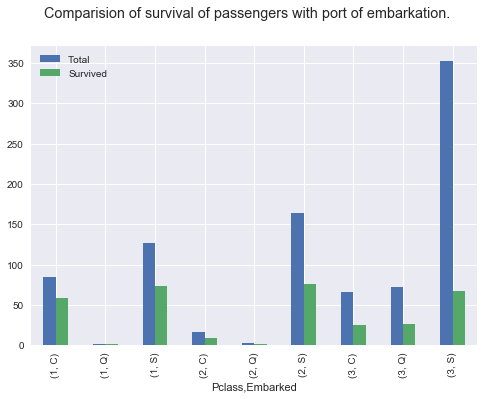

In [502]:
survivor_with_emb1=titanic_survivor.groupby(['Pclass','Embarked'])['Embarked'].count()
survivor_with_emb2=titanic_survivor.groupby(['Pclass','Embarked'])['Survived'].sum()
survivor_with_emb3=pd.concat([survivor_with_emb1,survivor_with_emb2], axis=1)
survivor_with_emb=survivor_with_emb3.rename(index=str,columns={'Embarked':'Total'})
survivor_with_emb['Survived_percent']=survivor_with_emb['Survived']*100/survivor_with_emb['Total']
survivor_with_emb=survivor_with_emb.drop(['Survived_percent'],1)
print(survivor_with_emb)
survivor_with_emb.plot(kind= 'bar')
plt.suptitle('Comparision of survival of passengers with port of embarkation.')
#ax.set_ylabel('Survival percentage')
plt.show()                        